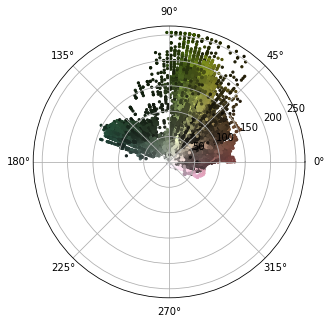

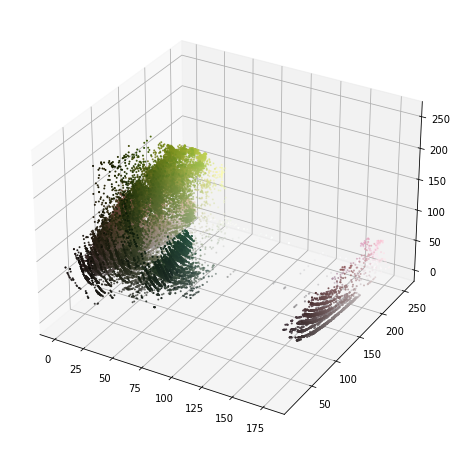

In [136]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

def show_img(path):

    img = cv2.imread(path)
    img.resize(300,200,3)

    rgbimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    hsvimg = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = hsvimg[:,:,0], hsvimg[:,:,1], hsvimg[:,:,2]



    fig = plt.figure(figsize=(5, 5))
    ax=plt.subplot(111,projection="polar")
 
    
    
    """
    ax.set_thetagrids(np.arange(0.0, 360.0, 15.0))
    ax.set_thetamin(0.0)  # 设置极坐标图开始角度为0°
    ax.set_thetamax(360.0)  # 设置极坐标结束角度为180°
    ax.set_rgrids(np.arange(0, 255.0, 100.0))
    ax.set_rlabel_position(0.0)  # 标签显示在0°
    ax.set_rlim(0.0, 360.0)  # 标签范围为[0, 5000)
    
    ax.grid(True, linestyle="-", color="k", linewidth=0.5, alpha=0.5)"
    """    
    #ax.set_axisbelow('True')  # 使散点覆盖在坐标系之上

    h2=np.asarray(h,dtype="float")
    plt.scatter(h2.flatten()*2*math.pi/178.0, s.flatten(), s=5.0,c=rgbimg.reshape(-1,3)/255.0)
    plt.show()

    fig = plt.figure(figsize=(8, 8))
    ax = plt.axes(projection='3d')
    ax.scatter3D(h, v, s, c=rgbimg.reshape(-1,3)/255.0,s=1)
    #return hist_r,hist_g, hist_b, hist_h, hist_s, hist_v

show_img(r"E:\Downloads\BaiduNetdiskDownload\testfile\2L7A2044.JPG")
#show_img(r"E:\Downloads\BaiduNetdiskDownload\output\2L7A1998_kmeans.png")


In [163]:
import numpy as np
import cv2 

from matplotlib import colors
import matplotlib.pyplot as plt
import colour


class ImageAnalysis:
    
    
    # rgb 表达方式转化
    def ColorDistribution2(image):
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            modified_img = image.reshape(image.shape[0]*image.shape[1], 3)
            hexcolorlist=[]
            for i in range(len(modified_img)):
                #去掉黑色
                if (ImageAnalysis.rgb_to_hex(modified_img[i]) != "#000000"):
                    hexcolorlist.append(ImageAnalysis.rgb_to_hex(modified_img[i]))

            unique,counts=np.unique(hexcolorlist,return_counts=True)

            return (unique,counts)
        
    def rgb_to_hex(rgb_color):
        hex_color = "#"
        for i in rgb_color:
            num = int(i)
            #hex_color += ("{:02x}".format(i))
            hex_color += str(hex(num))[-2:].replace("x","0").upper()
        return hex_color
    
    def hex_to_rgb(hex):
        hex = hex.lstrip('#')
        r= int(hex[0:2],16)
        g= int(hex[2:4],16)
        b= int(hex[4:6],16)
        rgb = [r,g,b]
        return rgb

    def hexrgb2munsell(hex):
        rgb=ImageAnalysis.hex_to_rgb(hex)/255.0
        XYZ = colour.sRGB_to_XYZ(rgb)
        xyY = colour.XYZ_to_xyY(XYZ)
        munsell = colour.xyY_to_munsell_colour(xyY)
        return munsell

In [164]:
import matplotlib.pyplot as plt
import numpy as np



image = cv2.imread(r"E:\Downloads\BaiduNetdiskDownload\output\2L7A2000_kmeans.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)




hexcolorlist,counts=ImageAnalysis.ColorDistribution2(image)

munsells=[]
for hexcolor in hexcolorlist:
    munsells.append(ImageAnalysis.hexrgb2munsell(hexcolor))


percentages = counts / counts.sum() * 100

fig, ((ax1, ax2,ax3)) = plt.subplots(ncols=1, nrows=3, figsize=(10, 15))

ax1.imshow(image)
ax1.axis('off')

color_labels = [f'{label}:\n{perc:.1f} %' for label, perc in zip(munsells, percentages)]
ax2.pie(counts, labels=color_labels, colors=hexcolorlist)

bars = ax3.bar(munsells.astype(str), counts, color=hexcolorlist, edgecolor='black')
ax3.bar_label(bars, [f'{perc:.1f} %' for perc in percentages])
for spine in ['top', 'right']:
    ax3.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

TypeError: unsupported operand type(s) for /: 'list' and 'float'

0.6YR 4.9/13.0
